In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


**Import libraries**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


**For classification with TF, the dataset used here is CIFAR10 small image classification from Keras**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


Class name

In [0]:
#class_names = 

**Data exploration**

1.   List item
2.   List item



In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
len(y_train)

50000

In [0]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
y_test.shape

(10000, 1)

In [0]:
len(y_test)

10000

**Data Preprocessing**

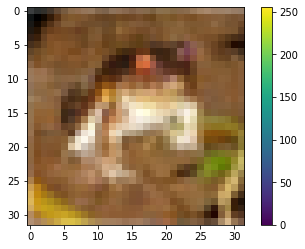

In [0]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Scale the train and test data**

In [0]:
x_train = x_train / 255.0

x_test = x_test / 255.0

**Displaying the first 25 images from the training dataset to verify**

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


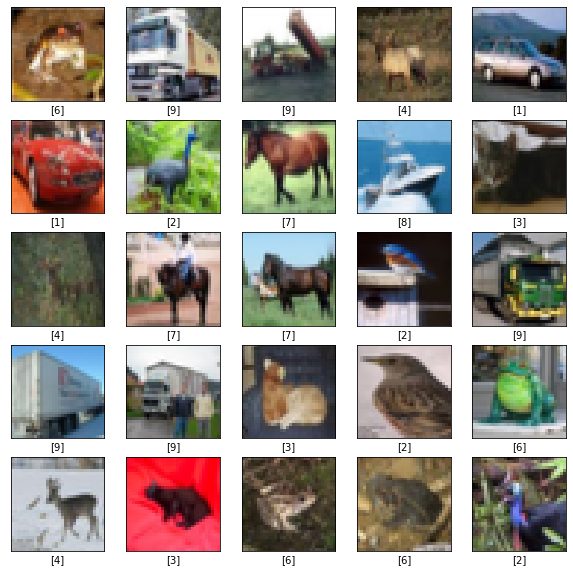

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

**BUILDING THE MODEL**

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**


In [0]:
model.fit(x_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 141us/sample - loss: 1.9150 - accuracy: 0.3109
Epoch 2/10
50000/50000 [==============================] - 7s 133us/sample - loss: 1.7704 - accuracy: 0.3683
Epoch 3/10
50000/50000 [==============================] - 7s 134us/sample - loss: 1.7241 - accuracy: 0.3864
Epoch 4/10
50000/50000 [==============================] - 6s 129us/sample - loss: 1.6864 - accuracy: 0.3974
Epoch 5/10
50000/50000 [==============================] - 7s 133us/sample - loss: 1.6628 - accuracy: 0.4088
Epoch 6/10
50000/50000 [==============================] - 7s 131us/sample - loss: 1.6435 - accuracy: 0.4157
Epoch 7/10
50000/50000 [==============================] - 7s 134us/sample - loss: 1.6277 - accuracy: 0.4201
Epoch 8/10
50000/50000 [==============================] - 7s 135us/sample - loss: 1.6252 - accuracy: 0.4201
Epoch 9/10
50000/50000 [==============================] - 6s 128us/sample - loss: 1.6094 - accuracy: 0.4289
Epoch

In [0]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.5914 - accuracy: 0.4338

Test accuracy: 0.4338


Note: accuracy is low? Recheck

**Making predictions**

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(x_test)

first prediction


In [0]:
predictions[0]

array([0.05571656, 0.0198502 , 0.23594749, 0.18085538, 0.07470245,
       0.09391536, 0.23210649, 0.00354211, 0.09699819, 0.00636574],
      dtype=float32)

In [0]:
np.argmax(predictions[0])

2

**Plotting predictions**

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Verify predictions**

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

**Predicting single image**

In [0]:
# Grab an image from the test dataset.
img = x_test[1]

print(img.shape)

(32, 32, 3)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.06138793 0.41320375 0.00271645 0.00398897 0.00177504 0.0015285
  0.00073519 0.00057479 0.24090931 0.27318   ]]


In [0]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

1